# Duomenų analizei duomenys paimti iš https://www.fueleconomy.gov/ siekiant pažiūtrėti automobilių ekonomiškumą ir ekologiškumą

# Darbo tikslas (Hipotezė)

## Patikrinti ar BMW markės automobiliai yra labiau ekonomiški bei ekologiški nei Volvo

# Darbui reikalingų paketų importavimas

In [98]:
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# Duomenų sukėlimas į Jupyter

In [6]:
d09 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\09tstcar.csv')
d09.head(10)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001319,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0113,0.340,252.0,0.0030,NaN,NaN,NaN,35.0,MPG,NaN,NaN,NaN,NaN,38.9,0.474,0.0174,9.5,0.340,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001322,MFR,No,NaN,NaN,NaN,NaN,95,SC03,61,Tier 2 Cert Gasoline,SC03,0.0497,0.960,468.0,0.0060,NaN,NaN,NaN,18.8,MPG,NaN,NaN,NaN,NaN,38.9,0.474,0.0174,9.5,0.340,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001323,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0338,0.450,403.0,0.0220,NaN,NaN,NaN,21.9,MPG,20.5,21.2,24.8,NaN,38.9,0.474,0.0174,9.5,0.340,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000643,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0007,0.260,287.0,0.0050,NaN,0.000001,0.01,30.7,MPG,NaN,NaN,NaN,NaN,33.0,0.290,0.0171,5.0,0.150,0.0172,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000646,MFR,No,NaN,NaN,NaN,NaN,11,Cold CO,27,Cold CO Premium (Tier 2),FTP,0.6673,1.330,467.0,0.0570,NaN,NaN,NaN,18.8,MPG,15.5,18.8,22.1,NaN,33.0,0.290,0.0171,5.0,0.150,0.0172,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
5,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10001141,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0267,0.260,389.0,0.0320,NaN,0.003200,0.01,22.7,MPG,21.3,22.4,24.4,NaN,33.0,0.290,0.0171,5.0,0.150,0.0172,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
6,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10001384,MFR,No,NaN,NaN,NaN,NaN,95,SC03,61,Tier 2 Cert Gasoline,SC03,0.0062,0.230,475.0,0.0570,NaN,NaN,NaN,18.6,MPG,NaN,NaN,NaN,NaN,33.0,0.290,0.0171,5.0,0.150,0.0172,TWC,Three-way cat

In [7]:
d10 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\10tstcar.csv')
d10.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005392,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.01817,0.1251,649.270,0.0211,NaN,NaN,NaN,13.8,MPG,13.38,12.88,16.26,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
1,2010,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005396,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00042,0.0184,378.310,0.0079,NaN,NaN,NaN,23.7,MPG,NaN,NaN,NaN,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
2,2010,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,470,12.0,AM09/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.15,28.6,1,Not eqipped,AASX10005451,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.06400,0.6930,546.445,0.0420,NaN,NaN,NaN,16.1,MPG,16.26,14.76,19.30,NaN,39.5,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [8]:
d11 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\11tstcar.csv')
d11.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2011,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005392,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.01817,0.1251,649.270,0.0211,NaN,NaN,NaN,13.8,MPG,13.38,12.88,16.26,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
1,2011,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005396,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00042,0.0184,378.310,0.0079,NaN,NaN,NaN,23.7,MPG,NaN,NaN,NaN,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
2,2011,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,470,12.0,AM09/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.15,28.6,1,Not eqipped,AASX10005451,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.06400,0.6930,546.445,0.0420,NaN,NaN,NaN,16.1,MPG,16.26,14.76,19.30,NaN,39.5,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [9]:
d12 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\12tstcar.csv')
d12.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2012,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005392,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.01817,0.1251,649.270,0.0211,NaN,NaN,NaN,13.8,MPG,13.38,12.88,16.26,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
1,2012,aston martin,ASX,Aston Martin,DB9,106CP101,0,5.9,9ASXV05.9VH1,Car,470,NaN,AM09/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.54,34.9,1,Not eqipped,9ASX10005396,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00042,0.0184,378.310,0.0079,NaN,NaN,NaN,23.7,MPG,NaN,NaN,NaN,NaN,39.5,0.8444,0.0119,19.11,0.4320,0.0147,NaN,NaN,N,NaN,NaN,N,No averaging
2,2012,aston martin,ASX,Aston Martin,DB9,KX08PBV,0,5.9,AASXV05.9VH1,Car,470,12.0,AM09/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.15,28.6,1,Not eqipped,AASX10005451,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.06400,0.6930,546.445,0.0420,NaN,NaN,NaN,16.1,MPG,16.26,14.76,19.30,NaN,39.5,0.8444,0.0119,2.23,0.6948,0.0130,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [10]:
d13 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\13tstcar.csv')
d13.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2013,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0251,0.1200,550.2700,0.0200,NaN,0.0033,0.0024,16.1,MPG,15.803,15.157,18.626,NaN,43.17,0.7502,0.0163,8.35,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2013,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0022,0.0118,343.8800,0.0067,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.35,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2013,aston martin,ASX,Aston Martin,V8 VANTAGE,210TT241,0,4.7,BASXV04.7VH2,Car,420,8.0,AM14/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4000,3.91,38.6,1,Not eqipped,BASX10011043,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0358,0.7897,551.4037,0.0272,NaN,NaN,NaN,16.0,MPG,16.307,14.527,19.508,NaN,45.78,0.0008,0.0217,22.05,0.4056,0.0239,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [11]:
d14 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\14tstcar.csv')
d14.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2014,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0251,0.1200,550.2700,0.0200,NaN,0.0033,0.0024,16.1,MPG,15.803,15.157,18.626,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.35,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2014,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0022,0.0118,343.8800,0.0067,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.35,0.2990,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2014,aston martin,ASX,Aston Martin,V8 VANTAGE,210TT241,0,4.7,BASXV04.7VH2,Car,420,8.0,AM14/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4000,3.91,38.6,1,Not eqipped,BASX10011043,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0358,0.7897,551.4037,0.0272,NaN,NaN,NaN,16.0,MPG,16.307,14.527,19.508,NaN,NaN,NaN,NaN,45.78,0.0008,0.0217,22.05,0.4056,0.0239,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [12]:
d15 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\15tstcar.csv')
d15.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0251,0.1200,550.27,0.0200,NaN,0.0033,0.0024,16.1,MPG,15.803,15.157,18.626,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0022,0.0118,343.88,0.0067,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2015,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,552,12.0,AM29/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4750,2.73,22.4,1,Not eqipped,FASX10032202,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0269,0.5000,511.93,0.0090,NaN,0.0066,NaN,17.3,MPG,17.438,15.956,20.413,NaN,99.99,99.99,99.99,32.66,0.6085,0.0198,1.093,2.198,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [13]:
d15 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\15tstcar.csv')
d15.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0251,0.1200,550.27,0.0200,NaN,0.0033,0.0024,16.1,MPG,15.803,15.157,18.626,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2015,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0022,0.0118,343.88,0.0067,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2015,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,552,12.0,AM29/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4750,2.73,22.4,1,Not eqipped,FASX10032202,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0269,0.5000,511.93,0.0090,NaN,0.0066,NaN,17.3,MPG,17.438,15.956,20.413,NaN,99.99,99.99,99.99,32.66,0.6085,0.0198,1.093,2.198,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [14]:
d16 = pd.read_csv('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\16tstcar.csv')
d16.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2016,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0251,0.1200,550.27,0.0200,NaN,0.0033,0.0024,16.1,MPG,15.803,15.157,18.626,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2016,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.9,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0022,0.0118,343.88,0.0067,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.17,0.7502,0.0163,8.350,0.299,0.0192,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2016,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,552,12.0,AM29/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4750,2.73,22.4,1,Not eqipped,FASX10032202,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0269,0.5000,511.93,0.0090,NaN,0.0066,NaN,17.3,MPG,17.438,15.956,20.413,NaN,99.99,99.99,99.99,32.66,0.6085,0.0198,1.093,2.198,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [15]:
d17 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\17tstcar.xlsx')
d17.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2017,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.839,17.985,21.635,NaN,-2.53,-1.73,-1.71,40.94,0.0169,0.0271,6.810,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2017,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.70,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,1.36,0.44,-0.59,40.94,0.0169,0.0271,6.810,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2017,aston martin,ASX,Aston Martin,Rapide S,410TT4202,0,6.0,FASXV06.0VHB,Car,552,12.0,AM29/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4750,2.73,22.4,1,Not eqipped,FASX10032202,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026900,0.500000,511.93,0.0090,NaN,0.0066,NaN,17.3,MPG,17.438,15.956,20.413,NaN,99.99,99.99,99.99,32.66,0.6085,0.0198,1.093,2.1980,0.0280,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [16]:
d18 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\18tstcar.xlsx')
d18.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2018,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.8390,17.9850,21.6350,NaN,-2.53,-1.73,-1.71,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2018,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,1.36,0.44,-0.59,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2018,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,JASX10050824,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026500,0.070000,386.66,0.0290,NaN,0.0054,0.0064,22.7,MPG,22.7357,21.7727,24.8773,NaN,-11.99,-9.26,-7.71,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [17]:
d19 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\19tstcar.xlsx')
d19.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2019,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.8390,17.9850,21.6350,NaN,-2.53,-1.73,-1.71,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2019,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,1.36,0.44,-0.59,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2019,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,JASX10050824,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026500,0.070000,386.66,0.0290,NaN,0.0054,0.0064,22.7,MPG,22.7357,21.7727,24.8773,NaN,-11.99,-9.26,-7.71,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [18]:
d20 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\20tstcar.xlsx')
d20.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.8390,17.9850,21.6350,NaN,-2.53,-1.73,-1.71,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,1.36,0.44,-0.59,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,JASX10050824,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026500,0.070000,386.66,0.0290,NaN,0.0054,0.0064,22.7,MPG,22.7357,21.7727,24.8773,NaN,-11.99,-9.26,-7.71,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [19]:
d21 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\21tstcar.xlsx')
d21.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2021,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045047,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.024700,0.418000,466.87,0.0249,NaN,0.0076,0.0045,18.8,MPG,17.8390,17.9850,21.6350,NaN,-2.53,-1.73,-1.71,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2021,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,600,12.0,AE31/,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,HASX10045048,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.001155,0.067334,285.00,0.0110,NaN,NaN,NaN,30.9,MPG,NaN,NaN,NaN,NaN,1.36,0.44,-0.59,40.94,0.0169,0.0271,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2021,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,503,8.0,177950,SA,Semi-Automatic,8,Y,R,"2-Wheel Drive, Rear",2,Top gear ratio < 1,4500,2.7,22.2,1,Not eqipped,JASX10050824,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.026500,0.070000,386.66,0.0290,NaN,0.0054,0.0064,22.7,MPG,22.7357,21.7727,24.8773,NaN,-11.99,-9.26,-7.71,40.94,0.0169,0.0271,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [20]:
d22 = pd.read_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\Fuel\\22tstcar.xlsx')
d22.head(3)

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2022,BMW,BMX,BMW,228i Gran Coupe,7F72606,0,2.0,MBMXJ02.0B4X,Both,228,4.0,B46A20O1F44S,SA,Semi-Automatic,8,Y,F,"2-Wheel Drive, Front",2,Top gear ratio < 1,3750,2.95,27.4,1,Not eqipped,MBMX10066519,MFR,No,NaN,NaN,NaN,NaN,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,FTP,0.006645,0.246809,278.759525,0.002467,NaN,0.001208,0.000097,31.5,MPG,30.182742,31.399167,32.633424,NaN,1.877751,1.229483,-0.518958,36.3,0.043,0.01823,18.1,0.009,0.01823,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2022,BMW,BMX,BMW,228i Gran Coupe,7F72606,0,2.0,MBMXJ02.0B4X,Both,228,4.0,B46A20O1F44S,SA,Semi-Automatic,8,Y,F,"2-Wheel Drive, Front",2,Top gear ratio < 1,3750,2.95,27.4,1,Not eqipped,MBMX10066520,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.000649,0.002998,175.495320,0.002301,NaN,0.000000,NaN,50.2,MPG,NaN,NaN,NaN,NaN,4.908606,3.686350,-0.724106,36.3,0.043,0.01823,18.1,0.009,0.01823,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2022,BMW,BMX,BMW,228i Gran Coupe,7F72606,1,2.0,MBMXJ02.0B4X,Both,228,4.0,B46A20O1F44S,SA,Semi-Automatic,8,Y,F,"2-Wheel Drive, Front",2,Top gear ratio < 1,3750,2.95,27.4,1,Not eqipped,MBMX10066437,MFR,No,NaN,NaN,NaN,NaN,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,FTP,0.005020,0.217881,287.670279,0.002187,NaN,0.000927,0.000146,30.5,MPG,29.377903,30.632087,31.265065,NaN,0.097767,-0.160708,-0.934892,47.3,0.067,0.01781,26.8,0.228,0.01564,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


# Atskiros lentelės jungiamos į vieną

In [21]:
a1 = pd.concat([d09,d10,d11,d12,d13,])
a1

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001319,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.01130,0.3400,252.0000,0.00300,NaN,NaN,NaN,35.0,MPG,NaN,NaN,NaN,NaN,38.90,0.4740,0.017400,9.50,0.3400,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001322,MFR,No,NaN,NaN,NaN,NaN,95,SC03,61,Tier 2 Cert Gasoline,SC03,0.04970,0.9600,468.0000,0.00600,NaN,NaN,NaN,18.8,MPG,NaN,NaN,NaN,NaN,38.90,0.4740,0.017400,9.50,0.3400,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001323,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.03380,0.4500,403.0000,0.02200,NaN,NaN,NaN,21.9,MPG,20.50,21.20,24.80,NaN,38.90,0.4740,0.017400,9.50,0.3400,0.0176,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000643,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00070,0.2600,287.0000,0.00500,NaN,0.000001,0.01,30.7,MPG,NaN,NaN,NaN,NaN,33.00,0.2900,0.017100,5.00,0.1500,0.0172,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000646,MFR,No,NaN,NaN,NaN,NaN,11,Cold CO,27,Cold CO Premium (Tier 2),FTP,0.66730,1.3300,467.0000,0.05700,NaN,NaN,NaN,18.8,MPG,15.50,18.80,22.10,NaN,33.00,0.2900,0.017100,5.00,0.1500,0.0172,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4256,2013,VPG,TVP,VPG,MV-1,523MF1163BM000007,0,4.600,BTVPT04.6GS1,Truck,248,8.0,CTVPV04G00,A,Automatic,4,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,5250,3.45,28.4,1,Not eqipped,BTVP10022464,MFR,No,NaN,NaN,NaN,NaN,11,Cold CO,27,Cold CO Premium (Tier 2),FTP,0.36100,1.7800,585.8000,0.07300,NaN,0.021000,NaN,14.9,MPG,12.69,15.47,16.24,NaN,37.57,0.7679,0.029600,13.18,0.1812,0.0340,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4257,2013,VPG,TVP,VPG,M

In [22]:
a2 = pd.concat([d14,d15,d16,d17,d18,d19,d20,d21,d22])
a2

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2014,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.900,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022045,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.02510,0.12000,550.2700,0.02000,NaN,0.0033,0.0024,16.1,MPG,15.8030,15.1570,18.6260,NaN,NaN,NaN,NaN,43.170,0.75020,0.016300,8.350,0.29900,0.019200,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2014,aston martin,ASX,Aston Martin,DB9,143TT1042,0,5.900,DASXV05.9VH1,Car,510,12.0,AM11/,SA,Semi-Automatic,6,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4500,3.46,31.0,1,Not eqipped,DASX10022046,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00220,0.01180,343.8800,0.00670,NaN,NaN,NaN,25.8,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.170,0.75020,0.016300,8.350,0.29900,0.019200,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2014,aston martin,ASX,Aston Martin,V8 VANTAGE,210TT241,0,4.700,BASXV04.7VH2,Car,420,8.0,AM14/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4000,3.91,38.6,1,Not eqipped,BASX10011043,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.03580,0.78970,551.4037,0.02720,NaN,NaN,NaN,16.0,MPG,16.3070,14.5270,19.5080,NaN,NaN,NaN,NaN,45.780,0.00080,0.021700,22.050,0.40560,0.023900,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2014,aston martin,ASX,Aston Martin,V8 VANTAGE,210TT241,0,4.700,BASXV04.7VH2,Car,420,8.0,AM14/,M,Manual,6,N,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4000,3.91,38.6,1,Not eqipped,BASX10011044,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.00790,0.31470,333.2900,0.05400,NaN,NaN,NaN,26.5,MPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.780,0.00080,0.021700,22.050,0.40560,0.023900,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2014,aston martin,ASX,Aston Martin,V8 VANTAGE S,270TT244,0,4.700,BASXV04.7VH2,Car,430,8.0,AM15/,AM,Automated Manual,7,Y,R,"2-Wheel Drive, Rear",2,Top gear ration < 1,4000,4.18,36.2,1,Not eqipped,BASX10011714,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.02898,0.64907,529.3600,0.00786,NaN,0.0038,0.0038,16.7,MPG,17.0720,15.2490,19.8500,NaN,NaN,NaN,NaN,45.780,0.00080,0.021700,22.050,0.40560,0.023900,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,2022,Volvo,VVX,Volvo,XC90 T6 AWD,202107,1,1.969,NVVXJ02.0S32,Both

In [24]:
a = pd.concat([a1,a2],ignore_index=True)
a

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Transmission Lockup?,Drive System Code,Drive System Description,Transmission Overdrive Code,Transmission Overdrive Desc,Equivalent Test Weight (lbs.),Axle Ratio,N/V Ratio,Shift Indicator Light Use Cd,Shift Indicator Light Use Desc,Test Number,Test Originator,Analytically Derived FE?,ADFE Test Number,ADFE Total Road Load HP,ADFE Equiv. Test Weight (lbs.),ADFE N/V Ratio,Test Procedure Cd,Test Procedure Description,Test Fuel Type Cd,Test Fuel Type Description,Test Category,THC (g/mi),CO (g/mi),CO2 (g/mi),NOx (g/mi),PM (g/mi),CH4 (g/mi),N2O (g/mi),RND_ADJ_FE,FE_UNIT,FE Bag 1,FE Bag 2,FE Bag 3,FE Bag 4,Target Coef A (lbf),Target Coef B (lbf/mph),Target Coef C (lbf/mph**2),Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc,DT-Inertia Work Ratio Rating,DT-Absolute Speed Change Ratg,DT-Energy Economy Rating
0,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001319,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0113,0.34,252.0,0.003,NaN,NaN,NaN,35.0,MPG,NaN,NaN,NaN,NaN,38.900,0.47400,0.017400,9.500,0.34000,0.017600,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,NaN,NaN,NaN
1,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001322,MFR,No,NaN,NaN,NaN,NaN,95,SC03,61,Tier 2 Cert Gasoline,SC03,0.0497,0.96,468.0,0.006,NaN,NaN,NaN,18.8,MPG,NaN,NaN,NaN,NaN,38.900,0.47400,0.017400,9.500,0.34000,0.017600,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,NaN,NaN,NaN
2,2009,Audi,ADX,AUDI,A6 QUATTRO,93UF-CAQ,1,2.995,9ADXV03.03UF,Car,300,6.0,CCAA,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,2.86,27.0,1,Not eqipped,9ADX10001323,MFR,No,NaN,NaN,NaN,NaN,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,FTP,0.0338,0.45,403.0,0.022,NaN,NaN,NaN,21.9,MPG,20.5000,21.2000,24.8000,NaN,38.900,0.47400,0.017400,9.500,0.34000,0.017600,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,NaN,NaN,NaN
3,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000643,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0007,0.26,287.0,0.005,NaN,0.000001,0.0100,30.7,MPG,NaN,NaN,NaN,NaN,33.000,0.29000,0.017100,5.000,0.15000,0.017200,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,NaN,NaN,NaN
4,2009,Audi,ADX,Audi,Q5,93UC-Q5A,0,3.179,9ADXT03.23UC,Truck,270,6.0,CALB,A,Automatic,6,Y,F,"2-Wheel Drive, Front",2,Top gear ration < 1,4500,4.22,35.2,1,Not eqipped,9ADX10000646,MFR,No,NaN,NaN,NaN,NaN,11,Cold CO,27,Cold CO Premium (Tier 2),FTP,0.6673,1.33,467.0,0.057,NaN,NaN,NaN,18.8,MPG,15.5000,18.8000,22.1000,NaN,33.000,0.29000,0.017100,5.000,0.15000,0.017200,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54827,2022,Volvo,VVX,Volvo,XC90 T6 AWD,202107,1,1.969,NVVXJ02.0S32,Both,316,4.0,A2_1,SA,Semi-Automatic,8,Y,F,"2-Wheel Drive, Front",2,Top gear ratio < 1,5000,3.33,26.2,1,Not eqipped,NVVX10070271,MFR,No,NaN,NaN,NaN,NaN,3,HWFE,61,Tier 2 Cert Gasoline,HWY,0.0040,0.29,235.0,0.002,0.0002,0.002700,0

# Reikiamų darbui stulpelių pasirinkimas ir tvarkymas

In [36]:
lentele1 = a[['Model Year','Vehicle Manufacturer Name','Represented Test Veh Model','Vehicle Type',
            'Rated Horsepower','# of Cylinders and Rotors','Engine Code','Tested Transmission Type Code',
            'Tested Transmission Type','# of Gears','Drive System Code','Drive System Description',
            'Test Fuel Type Description','CO2 (g/mi)','RND_ADJ_FE']]
lentele1 



,Model Year,Vehicle Manufacturer Name,Represented Test Veh Model,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Drive System Code,Drive System Description,Test Fuel Type Description,CO2 (g/mi),RND_ADJ_FE
0,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,252.0,35.0
1,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,468.0,18.8
2,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,403.0,21.9
3,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,287.0,30.7
4,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Cold CO Premium (Tier 2),467.0,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54827,2022,Volvo,XC90 T6 AWD,Both,316,4.0,A2_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,235.0,37.5
54828,2022,Volvo,XC90 T8 AWD,Both,313,4.0,BR_1,SA,Semi-Automatic,8,A,All Wheel Drive,Tier 2 Cert Gasoline,NaN,NaN
54829,2022,Volvo,XC90 T8 AWD,Both,313,4.0,BR_1,SA,Semi-Automatic,8,A,All Wheel Drive,Tier 2 Cert Gasoline,222.0,39.8
54830,2022,Volvo,XC90 T8 AWD,Both,313,4.0,BR_1,SA,Semi-Automatic,8,A,All Wheel Drive,Tier 2 Cert Gasoline,NaN,NaN


In [37]:
lentele = lentele1.dropna()

In [38]:
lentele['Test Fuel Type Description'].value_counts()

Tier 2 Cert Gasoline                             42058
Federal Cert Diesel 7-15 PPM Sulfur               3011
E85 (85% Ethanol 15% EPA Unleaded Gasoline)       1937
CARB Phase II Gasoline                            1089
Cold CO Premium (Tier 2)                           961
Cold CO Regular (Tier 2)                           804
Cold CO Regular (CERT)                              83
Cold CO Premium (CERT)                              30
E85 (85% Ethanol 15% CAL Phase II Gasoline)         26
CNG                                                 24
Tier 3 E10 Premium Gasoline (9 RVP @Low Alt.)       21
EPA Unleaded Gasoline                               14
CARB LEV3 E10 Regular Gasoline                      14
Cold CO Diesel 7-15 ppm Sulfur                      12
LPG                                                  8
CARB LEV3 E10 Premium Gasoline                       6
Indolene 30                                          4
Cold CO E10 Premium Gasoline (Tier 3)                4
Tier 3 E10

In [39]:
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Cold CO Premium (Tier 2)'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Cold CO Regular (Tier 2)'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Cold CO Regular (CERT)'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Cold CO Premium (CERT)'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='LPG'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='CNG'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Indolene 30'].index,inplace = True)
lentele.drop(lentele[lentele['Test Fuel Type Description']=='Cold CO E10 Premium Gasoline (Tier 3)'].index,inplace = True)


lentele['Test Fuel Type Description'].value_counts()

Tier 2 Cert Gasoline                             42058
Federal Cert Diesel 7-15 PPM Sulfur               3011
E85 (85% Ethanol 15% EPA Unleaded Gasoline)       1937
CARB Phase II Gasoline                            1089
E85 (85% Ethanol 15% CAL Phase II Gasoline)         26
Tier 3 E10 Premium Gasoline (9 RVP @Low Alt.)       21
EPA Unleaded Gasoline                               14
CARB LEV3 E10 Regular Gasoline                      14
Cold CO Diesel 7-15 ppm Sulfur                      12
CARB LEV3 E10 Premium Gasoline                       6
Tier 3 E10 Regular Gasoline (9 RVP @Low Alt.)        3
Name: Test Fuel Type Description, dtype: int64

In [40]:
print(lentele['RND_ADJ_FE'].max())
print(lentele['RND_ADJ_FE'].min())

9999.9999999
0.9


In [41]:
lentele.drop(lentele[lentele['RND_ADJ_FE']==9999.9999999].index,inplace = True)
lentele.drop(lentele[lentele['RND_ADJ_FE']==0.9].index,inplace = True)

# Naujų stulpelių kūrimas

In [42]:
lentele['L/100'] = 235.214583 / lentele['RND_ADJ_FE']

In [43]:
lentele = lentele.rename(columns ={'RND_ADJ_FE':'MPG'})

lentele

,Model Year,Vehicle Manufacturer Name,Represented Test Veh Model,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Drive System Code,Drive System Description,Test Fuel Type Description,CO2 (g/mi),MPG,L/100
0,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,252.0,35.0,6.720417
1,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,468.0,18.8,12.511414
2,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,403.0,21.9,10.740392
3,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,287.0,30.7,7.661713
5,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,389.0,22.7,10.361876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54825,2022,Volvo,XC90 T5 FWD,Both,250,4.0,10_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,207.0,42.7,5.508538
54826,2022,Volvo,XC90 T6 AWD,Both,316,4.0,A2_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,369.0,23.9,9.841614
54827,2022,Volvo,XC90 T6 AWD,Both,316,4.0,A2_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,235.0,37.5,6.272389
54829,2022,Volvo,XC90 T8 AWD,Both,313,4.0,BR_1,SA,Semi-Automatic,8,A,All Wheel Drive,Tier 2 Cert Gasoline,222.0,39.8,5.909914


In [416]:
# Lietuvos taršos mokestis pagal CO2 kiekį ir kuro tipą.
# CO2        D    B    Dujos

# 0 - 115	0	0	0
# 116 - 130	0	0	0
# 131 - 140	30	15	13.5
# 141 - 150	60	30	27
# 151 - 160	90	45	40.5
# 161 - 170	120	60	54
# 171 - 180	150	75	67.5
# 181 - 190	180	90	81
# 191 - 200	210	105	94.5
# 201 - 210	240	120	108
# 211 - 220	270	135	121.5
# 221 - 230	300	150	135
# 231 - 240	330	165	148.5
# 241 - 250	360	180	162
# 251 - 260	390	195	175.5
# 261 - 270	420	210	189
# 271 - 280	450	225	202.5
# 281 - 290	480	240	216
# 291 - 300	510	255	229.5
# >=301	540	270


SyntaxError: invalid syntax (Temp/ipykernel_4316/2476742469.py, line 1)

In [46]:
conditions = [
    (lentele['CO2 (g/mi)'] <= 130),
    (lentele['CO2 (g/mi)'] > 130) & (lentele['CO2 (g/mi)'] <= 140) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 140) & (lentele['CO2 (g/mi)'] <= 150) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 150) & (lentele['CO2 (g/mi)'] <= 160) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 160) & (lentele['CO2 (g/mi)'] <= 170) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 170) & (lentele['CO2 (g/mi)'] <= 180) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 180) & (lentele['CO2 (g/mi)'] <= 190) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 190) & (lentele['CO2 (g/mi)'] <= 200) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 200) & (lentele['CO2 (g/mi)'] <= 210) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 210) & (lentele['CO2 (g/mi)'] <= 220) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 220) & (lentele['CO2 (g/mi)'] <= 230) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 230) & (lentele['CO2 (g/mi)'] <= 240) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 240) & (lentele['CO2 (g/mi)'] <= 250) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 250) & (lentele['CO2 (g/mi)'] <= 260) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 260) & (lentele['CO2 (g/mi)'] <= 270) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 270) & (lentele['CO2 (g/mi)'] <= 280) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 280) & (lentele['CO2 (g/mi)'] <= 290) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 290) & (lentele['CO2 (g/mi)'] <= 300) & lentele['Test Fuel Type Description'].str.contains('Diesel'),
    (lentele['CO2 (g/mi)'] > 300) & lentele['Test Fuel Type Description'].str.contains('Diesel')
    ]
values = [0, 30, 60, 90,120,150,180,220,250,270,300,330,360,390,420,450,480,510,540]

lentele['CO2 Tax'] = np.select(conditions, values)

lentele.head()
    

,Model Year,Vehicle Manufacturer Name,Represented Test Veh Model,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Drive System Code,Drive System Description,Test Fuel Type Description,CO2 (g/mi),MPG,L/100,CO2 Tax
0,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,252.0,35.0,6.720417,0
1,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,468.0,18.8,12.511414,0
2,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,403.0,21.9,10.740392,0
3,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,287.0,30.7,7.661713,0
5,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,389.0,22.7,10.361876,0


In [47]:
conditions1 = [
    (lentele['CO2 (g/mi)'] <= 130),
    (lentele['CO2 (g/mi)'] > 130) & (lentele['CO2 (g/mi)'] <= 140) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 140) & (lentele['CO2 (g/mi)'] <= 150) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 150) & (lentele['CO2 (g/mi)'] <= 160) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 160) & (lentele['CO2 (g/mi)'] <= 170) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 170) & (lentele['CO2 (g/mi)'] <= 180) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 180) & (lentele['CO2 (g/mi)'] <= 190) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 190) & (lentele['CO2 (g/mi)'] <= 200) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 200) & (lentele['CO2 (g/mi)'] <= 210) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 210) & (lentele['CO2 (g/mi)'] <= 220) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 220) & (lentele['CO2 (g/mi)'] <= 230) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 230) & (lentele['CO2 (g/mi)'] <= 240) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 240) & (lentele['CO2 (g/mi)'] <= 250) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 250) & (lentele['CO2 (g/mi)'] <= 260) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 260) & (lentele['CO2 (g/mi)'] <= 270) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 270) & (lentele['CO2 (g/mi)'] <= 280) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 280) & (lentele['CO2 (g/mi)'] <= 290) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 290) & (lentele['CO2 (g/mi)'] <= 300) & lentele['Test Fuel Type Description'].str.contains('Gasoline'),
    (lentele['CO2 (g/mi)'] > 300) & lentele['Test Fuel Type Description'].str.contains('Gasoline')
    ]
values1 = [0, 15, 30, 45,60,75,90,105,120,135,150,165,180,195,210,225,240,255,270]

lentele['CO2 Tax'] = np.select(conditions1, values1)

lentele.head()

,Model Year,Vehicle Manufacturer Name,Represented Test Veh Model,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Drive System Code,Drive System Description,Test Fuel Type Description,CO2 (g/mi),MPG,L/100,CO2 Tax
0,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,252.0,35.0,6.720417,195
1,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,468.0,18.8,12.511414,270
2,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,403.0,21.9,10.740392,270
3,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,287.0,30.7,7.661713,240
5,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,389.0,22.7,10.361876,270


In [48]:
lentele['CO2 Tax'].value_counts()

270    21576
0       3387
195     1962
135     1821
165     1821
180     1821
150     1807
120     1695
105     1572
225     1546
210     1523
255     1459
90      1445
240     1371
75      1108
60       849
45       752
30       442
15       188
Name: CO2 Tax, dtype: int64

In [49]:
lentele['CO2 Tax'].describe()

count    48145.000000
mean       195.336484
std         88.473252
min          0.000000
25%        135.000000
50%        240.000000
75%        270.000000
max        270.000000
Name: CO2 Tax, dtype: float64

In [50]:
lentele

,Model Year,Vehicle Manufacturer Name,Represented Test Veh Model,Vehicle Type,Rated Horsepower,# of Cylinders and Rotors,Engine Code,Tested Transmission Type Code,Tested Transmission Type,# of Gears,Drive System Code,Drive System Description,Test Fuel Type Description,CO2 (g/mi),MPG,L/100,CO2 Tax
0,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,252.0,35.0,6.720417,195
1,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,468.0,18.8,12.511414,270
2,2009,Audi,A6 QUATTRO,Car,300,6.0,CCAA,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,403.0,21.9,10.740392,270
3,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,287.0,30.7,7.661713,240
5,2009,Audi,Q5,Truck,270,6.0,CALB,A,Automatic,6,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,389.0,22.7,10.361876,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54825,2022,Volvo,XC90 T5 FWD,Both,250,4.0,10_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,207.0,42.7,5.508538,120
54826,2022,Volvo,XC90 T6 AWD,Both,316,4.0,A2_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,369.0,23.9,9.841614,270
54827,2022,Volvo,XC90 T6 AWD,Both,316,4.0,A2_1,SA,Semi-Automatic,8,F,"2-Wheel Drive, Front",Tier 2 Cert Gasoline,235.0,37.5,6.272389,165
54829,2022,Volvo,XC90 T8 AWD,Both,313,4.0,BR_1,SA,Semi-Automatic,8,A,All Wheel Drive,Tier 2 Cert Gasoline,222.0,39.8,5.909914,150


# Duomenų grupavimas grafikams

In [52]:
df = lentele.groupby(['Vehicle Manufacturer Name','Model Year'])['L/100'].mean()
df

Vehicle Manufacturer Name  Model Year
Audi                       2009          10.238889
                           2010           9.355936
                           2011          10.056769
                           2012           9.695875
                           2013           9.284846
                                           ...    
aston martin               2017          11.885121
                           2018          10.169801
                           2019           9.970473
                           2020           9.727756
                           2021          10.044125
Name: L/100, Length: 388, dtype: float64

In [53]:
volvo = df['Volvo']
volvo

Model Year
2009     8.496405
2010    10.071963
2011     9.156302
2012     8.862534
2013     9.000187
2014     9.484143
2015     8.998282
2016     8.057615
2017     7.559668
2018     6.863009
2019     6.870984
2020     7.053467
2021     6.955503
2022     6.745817
Name: L/100, dtype: float64

In [54]:
bmw = df['BMW']
bmw

Model Year
2009    7.529532
2010    9.115928
2011    8.276405
2012    8.328293
2013    7.865002
2014    6.927456
2015    7.018930
2016    7.141717
2017    7.345454
2018    7.176084
2019    7.469866
2020    7.582574
2021    7.442470
2022    7.512613
Name: L/100, dtype: float64

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]

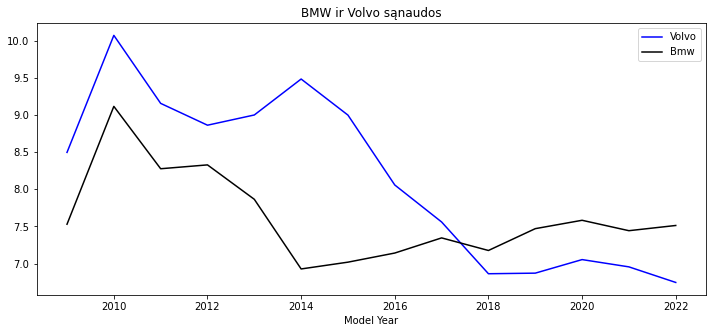

In [55]:

volvo.plot(color = 'b',title = 'BMW ir Volvo sąnaudos',x = 'Model Year', y = 'L/100'),bmw.plot(color = 'black')
L=plt.legend()
L.get_texts()[0].set_text('Volvo')
L.get_texts()[1].set_text('Bmw')



In [56]:
df1 = lentele.groupby(['Vehicle Manufacturer Name','Model Year'])['CO2 Tax'].mean()
df1

Vehicle Manufacturer Name  Model Year
Audi                       2009           63.750000
                           2010          157.582418
                           2011          195.214286
                           2012          199.698795
                           2013          208.022727
                                            ...    
aston martin               2017          265.500000
                           2018          255.000000
                           2019          252.500000
                           2020          250.500000
                           2021          253.750000
Name: CO2 Tax, Length: 388, dtype: float64

In [57]:
volvo1 = df1['Volvo']
volvo1

Model Year
2009    240.000000
2010    252.333333
2011    239.444444
2012    235.000000
2013    236.854839
2014    241.500000
2015    230.390625
2016    219.406780
2017    210.638298
2018    188.625000
2019    185.526316
2020    193.026316
2021    191.250000
2022    184.411765
Name: CO2 Tax, dtype: float64

In [58]:
bmw1 = df1['BMW']
bmw1

Model Year
2009    195.428571
2010    213.615108
2011    201.519757
2012    207.123288
2013    198.705036
2014    148.004115
2015    146.718750
2016    153.985602
2017    177.641221
2018    171.981908
2019    202.737844
2020    204.871194
2021    198.926702
2022    197.576687
Name: CO2 Tax, dtype: float64

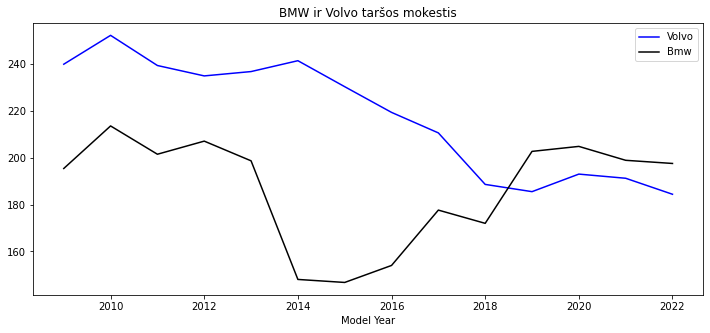

In [59]:
volvo1.plot(color = 'b',title = 'BMW ir Volvo taršos mokestis',x = 'Model Year', y = 'Taršos mokestis'),bmw1.plot(color = 'black')
L=plt.legend()
L.get_texts()[0].set_text('Volvo')
L.get_texts()[1].set_text('Bmw')


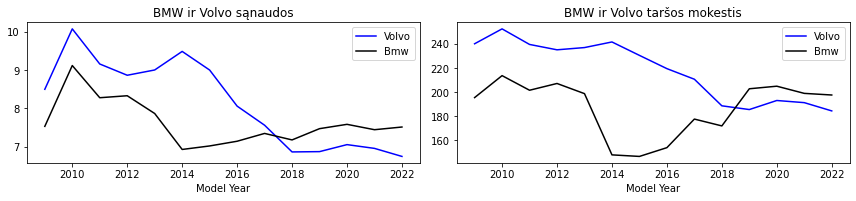

In [162]:
plt.subplot(2,2,1)
plt.title ('BMW ir Volvo sąnaudos') 
volvo.plot(color = 'b',title = 'BMW ir Volvo sąnaudos',x = 'Model Year', y = 'L/100'),bmw.plot(color = 'black')
L=plt.legend()
L.get_texts()[0].set_text('Volvo')
L.get_texts()[1].set_text('Bmw')

plt.subplot(2,2,2)
plt.title ('BMW ir Volvo taršos mokestis') 
volvo1.plot(color = 'b',title = 'BMW ir Volvo taršos mokestis',x = 'Model Year', y = 'Taršos mokestis'),bmw1.plot(color = 'black')
L=plt.legend()
L.get_texts()[0].set_text('Volvo')
L.get_texts()[1].set_text('Bmw')

plt.tight_layout()

# Tiesinė regresija

## Volvo

In [118]:
volvos = lentele[lentele['Vehicle Manufacturer Name'] == 'Volvo']
volvos = volvos[['Model Year','L/100']]
volvos
volvos = volvos.groupby('Model Year')['L/100'].mean()
volvos
volvos = volvos.to_frame(name = None)
volvos.reset_index(inplace = True)
volvos

,Model Year,L/100
0,2009,8.496405
1,2010,10.071963
2,2011,9.156302
3,2012,8.862534
4,2013,9.000187
5,2014,9.484143
6,2015,8.998282
7,2016,8.057615
8,2017,7.559668
9,2018,6.863009


<AxesSubplot:xlabel='Model Year', ylabel='L/100'>

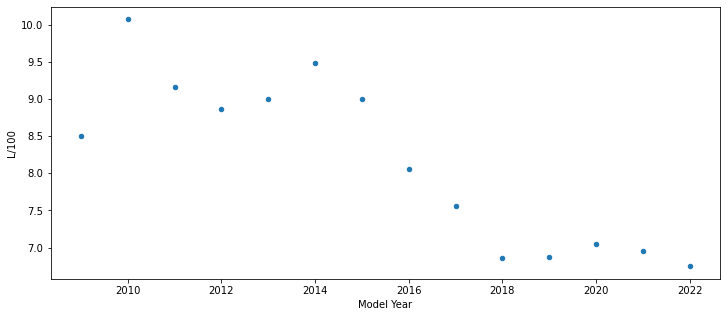

In [93]:
volvos.plot.scatter(x='Model Year', y='L/100')

In [94]:
volvos

,Model Year,L/100
0,2009,8.496405
1,2010,10.071963
2,2011,9.156302
3,2012,8.862534
4,2013,9.000187
5,2014,9.484143
6,2015,8.998282
7,2016,8.057615
8,2017,7.559668
9,2018,6.863009


In [95]:
X = volvos[['Model Year']]
X

,Model Year
0,2009
1,2010
2,2011
3,2012
4,2013
5,2014
6,2015
7,2016
8,2017
9,2018


In [96]:
y = volvos['L/100']
y

0      8.496405
1     10.071963
2      9.156302
3      8.862534
4      9.000187
5      9.484143
6      8.998282
7      8.057615
8      7.559668
9      6.863009
10     6.870984
11     7.053467
12     6.955503
13     6.745817
Name: L/100, dtype: float64

In [99]:
model = LinearRegression()
model

LinearRegression()

In [100]:
model.fit(X,y)

LinearRegression()

In [101]:
model.predict([[2023]])

array([6.38665536])

In [102]:
prediction = model.predict(X)
prediction

array([9.688349  , 9.45251374, 9.21667848, 8.98084322, 8.74500796,
       8.5091727 , 8.27333744, 8.03750218, 7.80166692, 7.56583166,
       7.3299964 , 7.09416114, 6.85832588, 6.62249062])

In [103]:
volvos['prediction'] = prediction

volvos

,Model Year,L/100,prediction
0,2009,8.496405,9.688349
1,2010,10.071963,9.452514
2,2011,9.156302,9.216678
3,2012,8.862534,8.980843
4,2013,9.000187,8.745008
5,2014,9.484143,8.509173
6,2015,8.998282,8.273337
7,2016,8.057615,8.037502
8,2017,7.559668,7.801667
9,2018,6.863009,7.565832


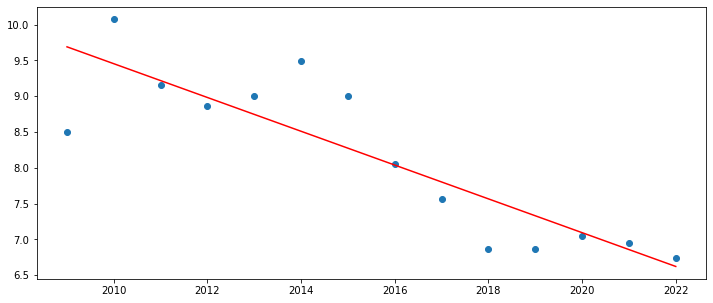

In [104]:
plt.scatter(X,y)
plt.plot(X,prediction,'r')

In [133]:
x_predict = np.array([2023,2024,2025])
x_predict = x_predict.reshape(-1,1)
x_predict 

array([[2023],
       [2024],
       [2025]])

In [134]:
y_predict = model.predict(x_predict)
y_predict

array([6.38665536, 6.1508201 , 5.91498484])

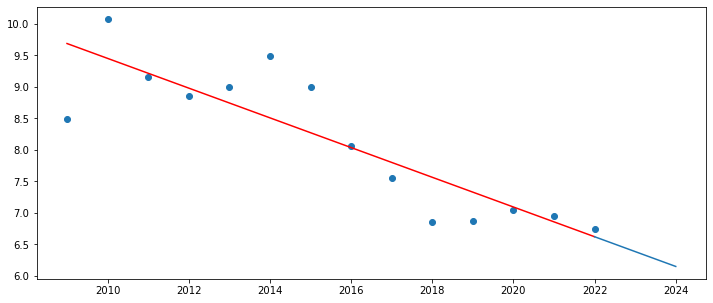

In [135]:
plt.scatter(X,y)
plt.plot(X,prediction,'r')
new_volvo = np.arange(2022,2025).reshape(-1,1)
plt.plot(new_volvo,model.predict(new_volvo))

In [136]:
r_squared = model.score(X, y)
r_squared

0.7528771480140415

## BMW

In [142]:
bmww = lentele[lentele['Vehicle Manufacturer Name'] == 'BMW']
bmww = bmww[['Model Year','L/100']]
bmww
bmww = bmww.groupby('Model Year')['L/100'].mean()
bmww
bmww = bmww.to_frame(name = None)
bmww.reset_index(inplace = True)
bmww

,Model Year,L/100
0,2009,7.529532
1,2010,9.115928
2,2011,8.276405
3,2012,8.328293
4,2013,7.865002
5,2014,6.927456
6,2015,7.018930
7,2016,7.141717
8,2017,7.345454
9,2018,7.176084


<AxesSubplot:xlabel='Model Year', ylabel='L/100'>

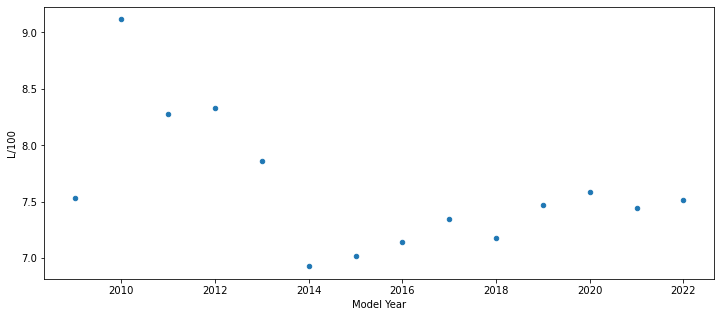

In [144]:
bmww.plot.scatter(x='Model Year', y='L/100')

In [145]:
X1 = bmww[['Model Year']]
X1

,Model Year
0,2009
1,2010
2,2011
3,2012
4,2013
5,2014
6,2015
7,2016
8,2017
9,2018


In [147]:
y1 = bmww['L/100']
y1

0     7.529532
1     9.115928
2     8.276405
3     8.328293
4     7.865002
5     6.927456
6     7.018930
7     7.141717
8     7.345454
9     7.176084
10    7.469866
11    7.582574
12    7.442470
13    7.512613
Name: L/100, dtype: float64

In [148]:
model1 = LinearRegression()
model1

LinearRegression()

In [149]:
model1.fit(X1,y1)

LinearRegression()

In [150]:
prediction1 = model1.predict(X1)
prediction1

array([8.09444099, 8.02202505, 7.94960912, 7.87719318, 7.80477724,
       7.7323613 , 7.65994537, 7.58752943, 7.51511349, 7.44269755,
       7.37028162, 7.29786568, 7.22544974, 7.1530338 ])

In [151]:
bmww['prediction'] = prediction1
bmww

,Model Year,L/100,prediction
0,2009,7.529532,8.094441
1,2010,9.115928,8.022025
2,2011,8.276405,7.949609
3,2012,8.328293,7.877193
4,2013,7.865002,7.804777
5,2014,6.927456,7.732361
6,2015,7.018930,7.659945
7,2016,7.141717,7.587529
8,2017,7.345454,7.515113
9,2018,7.176084,7.442698


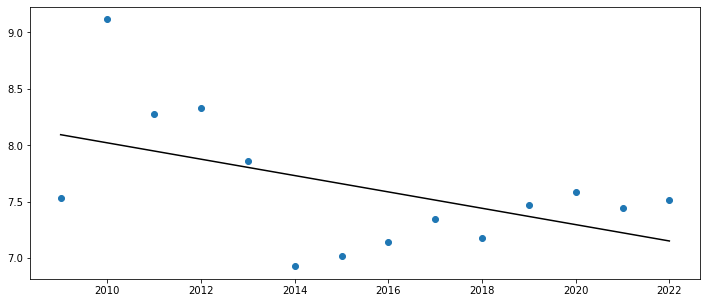

In [152]:
plt.scatter(X1,y1)
plt.plot(X1,prediction1,'black')

In [153]:
x1_predict = np.array([2023,2024,2025])
x1_predict = x1_predict.reshape(-1,1)
x1_predict

array([[2023],
       [2024],
       [2025]])

In [154]:
y1_predict = model.predict(x1_predict)
y1_predict

array([6.38665536, 6.1508201 , 5.91498484])

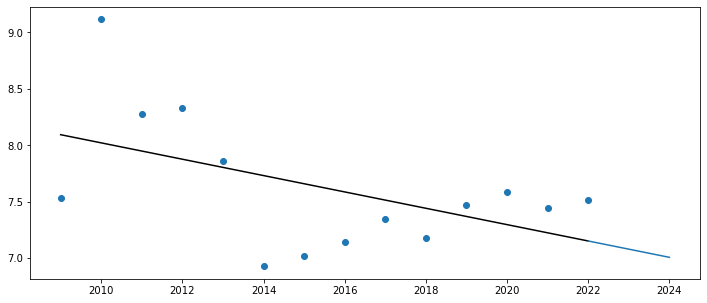

In [164]:
plt.scatter(X1,y1)
plt.plot(X1,prediction1,'black')
new_bmw = np.arange(2022,2025).reshape(-1,1)
plt.plot(new_bmw,model1.predict(new_bmw))

In [156]:
r_squared1 = model1.score(X1, y1)
r_squared1

0.25670570580690566

In [160]:
lentele.to_excel('C:\\Users\\HP\\OneDrive\\Stalinis kompiuteris\\Data Project\\New Folder\\lenteele.xlsx')

# Išvados

## BMW tiek kuro sąnaudų lygiu tiek taršos mokesčiu lenkia Volvo iki 2017 metų (sąnaudos bei taršos mokestis yra mažesni) o nuo 2017 metų Volvo lenkia BMW.
## Volvo metams bėgant sąnaudas sumažino beveik 2 litrais, BMW labai minimaliai - 200 ml.
## Senesni Volvo varikliai buvo didesni, bet silpni, todėl ir jų sąnaudos buvo didesnės nei BMW, tačiau nuo 2015 metų Volvo gamina mažesnius, bet daug galingesnius variklius, kuriems reikia mažiau kuro.